3. Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
    Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('..\data\da16-python-gdp-and-internet-use-analysis-DSVaughan266\data\gdp_per_capita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5.  How many rows and columns are in `gdp_df`? Rows: 8219 Columns: 4 
    What are the data types of each column? object, int64, float64, float64

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [6]:
gdp_df.describe()

,Year,Value,Value Footnotes
count,8219.000000,8219.000000,0.0
mean,2006.672345,20270.976242,NaN
std,9.782986,22532.004246,NaN
min,1990.000000,510.822823,NaN
25%,1998.000000,4284.868430,NaN
50%,2007.000000,11916.457927,NaN
75%,2015.000000,28543.305542,NaN
max,2023.000000,174339.077325,NaN


6.  Drop the `Value Footnotes` column.

In [7]:
gdp_df_droppedVF = gdp_df.drop("Value Footnotes", axis = 1)

In [8]:
print(gdp_df_droppedVF.columns)

Index(['Country or Area', 'Year', 'Value'], dtype='object')


6.  Rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df_droppedVF.columns = ["Country", "Year", "GDP_Per_Capita"]

In [10]:
gdp_df_droppedVF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [11]:
gdp_df_clean = gdp_df_droppedVF

7.  How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. 
    What do you notice? 

In [12]:
gdp_df_clean.groupby("Country").size()
# There are 247 countries

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Length: 247, dtype: int64

In [13]:
# Investigate the range of the data.
first_year = gdp_df_clean["Year"].min()
last_year = gdp_df_clean["Year"].max()
total_years = last_year - first_year + 1   

In [14]:
print("First year:", first_year)
print("Last_year:", last_year)
print("Total_years:", total_years)

First year: 1990
Last_year: 2023
Total_years: 34


In [15]:
# How many reports were made for each year?
year_counts = gdp_df_clean["Year"].value_counts()
print(year_counts)

Year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64


In [16]:
# There are 34 years of reported data. Some countries reported every year. How many and which ones?
country_counts =gdp_df_clean.groupby("Country").size()

In [17]:
countries_with_34 = country_counts[country_counts == 34].index.tolist()
print(countries_with_34)
len(countries_with_34)

['Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', "CÃ´te d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Euro area', 'Europe & Central Asia', 'Eu

228

There are 247 countries in the database with 228 of them reporting all 34 years.

7 (continued) - Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [18]:
countries_under_34 = country_counts[country_counts < 34].index.tolist()
print(countries_under_34)
len(country_counts[country_counts < 34])

['Afghanistan', 'Bhutan', 'Cayman Islands', 'CuraÃ§ao', 'Djibouti', 'Faroe Islands', 'Greenland', 'Kosovo', 'Lebanon', 'Montenegro', 'San Marino', 'Serbia', 'Sint Maarten (Dutch part)', 'Somalia', 'Syrian Arab Republic', 'Tonga', 'Turks and Caicos Islands', 'Virgin Islands', 'West Bank and Gaza']


19

In [19]:
# Save countries_under_34 as a dataframe named countries_not_reporting.
countries_not_reporting = gdp_df_clean[gdp_df_clean["Country"].isin(countries_under_34)]

In [20]:
# Create a pivot table to explore the 19 countries that did not report every year.
pd.set_option("display.max_columns", None)
countries_not_reporting.pivot_table(values = "GDP_Per_Capita", index = "Country", columns = "Year")

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1617.826475,1454.110782,1774.308743,1815.928200,1776.918207,1908.114782,1929.723897,2155.353068,2191.504356,2565.022086,2848.586061,2757.052587,2985.319145,3046.579931,3017.942544,2967.692067,2958.785399,2952.998916,2902.392113,2927.245144,2769.685745,2144.166570,1981.710168,1992.424394
Bhutan,3411.383758,3338.009421,3624.597815,3850.551289,4042.494178,4379.870466,4616.919791,4778.705118,4965.876461,5241.366635,5287.574345,5545.630553,5991.254968,6323.541195,6517.996826,6850.804409,7140.856092,8195.070744,8470.034709,9019.118607,9985.284554,10714.686563,11143.944530,11212.479421,11744.518905,12400.298322,13320.975897,13482.342525,13854.854392,14555.188398,12979.936945,13458.812664,14061.312021,NaN
Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92169.884858,92300.472741,89338.286496,80594.077543,76259.029743,75059.658068,73948.025817,72954.519588,73017.594917,73281.044763,73907.226044,74564.738646,76088.895062,77440.552065,72149.326889,74150.858095,76359.090883,78109.350659
CuraÃ§ao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34307.297561,35339.242550,35436.175750,34812.966213,34288.912643,33651.673784,33335.024391,33490.423549,33795.301040,33397.565318,33004.720235,32704.520308,32321.039547,31753.544205,31128.803852,30861.475937,30209.940151,29729.250843,29256.962891,28659.800035,23751.617219,25163.993660,27327.417189,28886.687492
Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4446.413425,4675.451817,4940.631622,5204.131084,5398.750771,5566.581289,5784.448008,5773.207493,5947.860884,6083.643682,6400.620163
Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53528.783801,50835.954215,50782.339145,52716.933935,56744.651904,60123.726708,63151.504427,63139.805723,63286.584220,64571.917120,65294.751748,67207.832476,65131.613376,67757.777323,69338.809824,70373.376932
Greenland,37619.556421,37644.577619,35849.487074,34108.678362,35934.108534,37073.577832,37573.333407,38057.177195,40936.545081,41500.603369,44368.720295,44812.169485,44173.928416,46004.078108,49055.217488,51480.132680,54494.310038,55992.239321,59684.355683,60206.538033,60625.162855,60340.052635,61267.465333,60822.135627,63919.154576,62503.397152,65345.932011,65396.682781,65979.161056,67604.050701,67560.253903,68086.460124,NaN,NaN
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7098.403019,7481.458898,7877.101999,8359.936215,8431.662327,8828.276833,9150.749973,9824.991060,10434.888826,10856.290207,11188.224463,11774.117851,11137.496635,12362.414097,13022.462744,13642.676957
Lebanon,5345.512097,7828.172011,8924.152646,9695.315492,10294.812771,10762.442696,11757.282489,11668.400685,11885.307228,11617.249771,11571.732604,11817.930501,12053.834156,12272.344068,12882.075800,13024.664892,13003.680804,13941.561424,14955.141356,16264.350618,17390.758401,17353.196085,17323.301376,16396.496930,15205.873265,14980.020516,15572.361174,16128.583820,16290.051648,15659.566104,12507.436637,11599.775508,11474.750585,NaN


These countries didn't begin reporting until atleast 2000, some as late as 2013:
Afghanistan, Cayman Islands, CuraAsao, Djibouti, Faroe Islands, Sint Maarten, Turks & Caicos, Virgin Islands

8.  In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
    Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
    Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? 
    How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

8.1. Create a histogram.

In [21]:
gdp_2020 = gdp_df_clean[gdp_df_clean["Year"] == 2020]

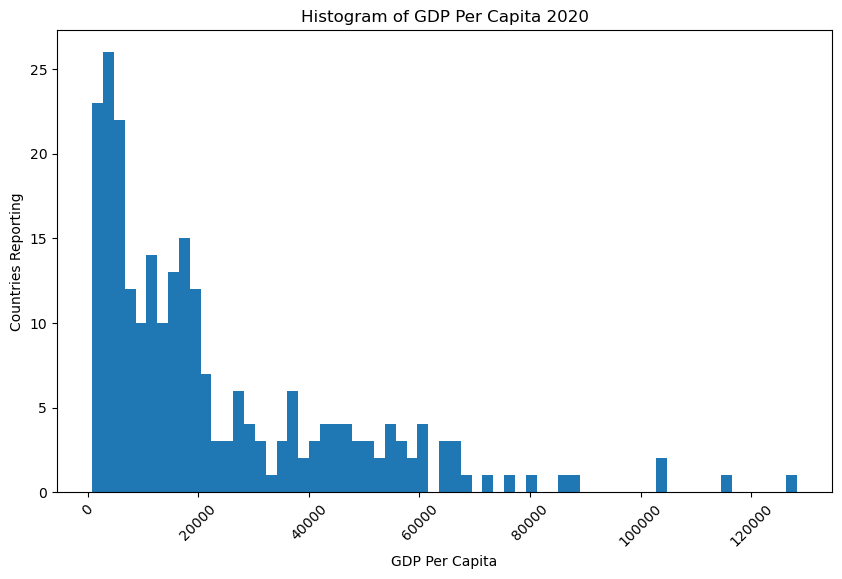

In [22]:
plt.figure(figsize=(10,6))
plt.hist(gdp_2020["GDP_Per_Capita"], bins=65)
plt.title("Histogram of GDP Per Capita 2020")
plt.ylabel("Countries Reporting")
plt.xlabel("GDP Per Capita")
plt.xticks(rotation=45)
plt.show()

8.2. Create a density plot.

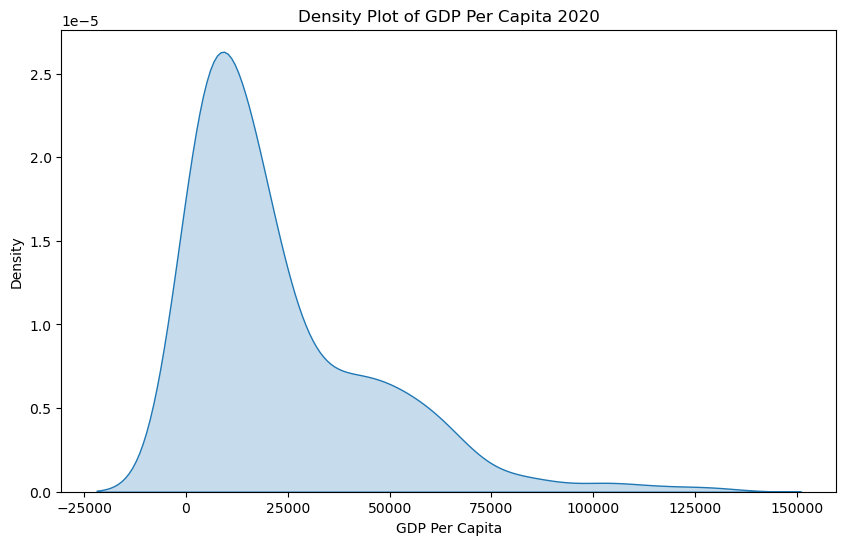

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(gdp_2020["GDP_Per_Capita"], fill=True)
plt.xlabel("GDP Per Capita")
plt.title("Density Plot of GDP Per Capita 2020")
plt.show()

8.3. Create a box plot.
This one has a single axis. The black cirlces to the right are the outliers with greater GDP Per Capita.

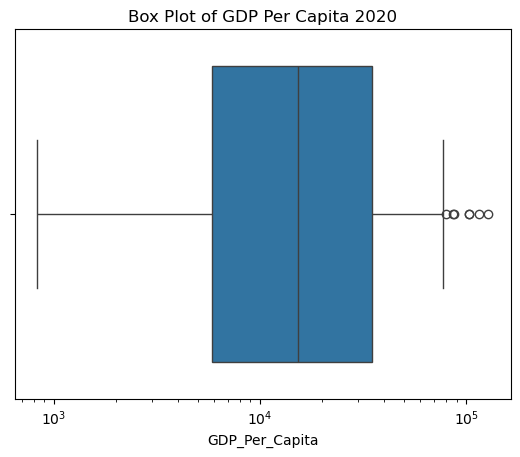

In [24]:
sns.boxplot(x=gdp_2020["GDP_Per_Capita"])
plt.xscale("log")
plt.title("Box Plot of GDP Per Capita 2020")
plt.show()

This boxplot has two axises. Country on x axis and GDP Per Capita on y axis. 

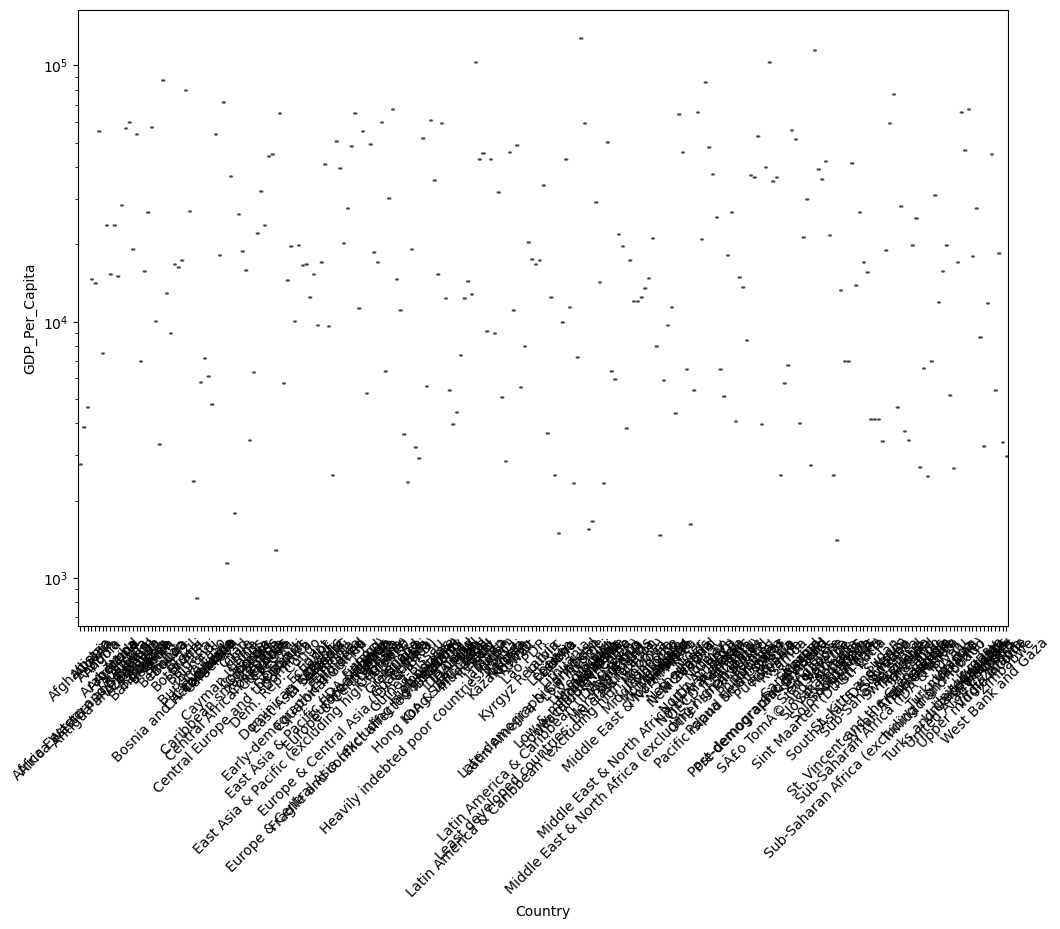

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=gdp_2020, x="Country", y="GDP_Per_Capita")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

I tried reversing the axises, but it changed...I am not sure I understand.

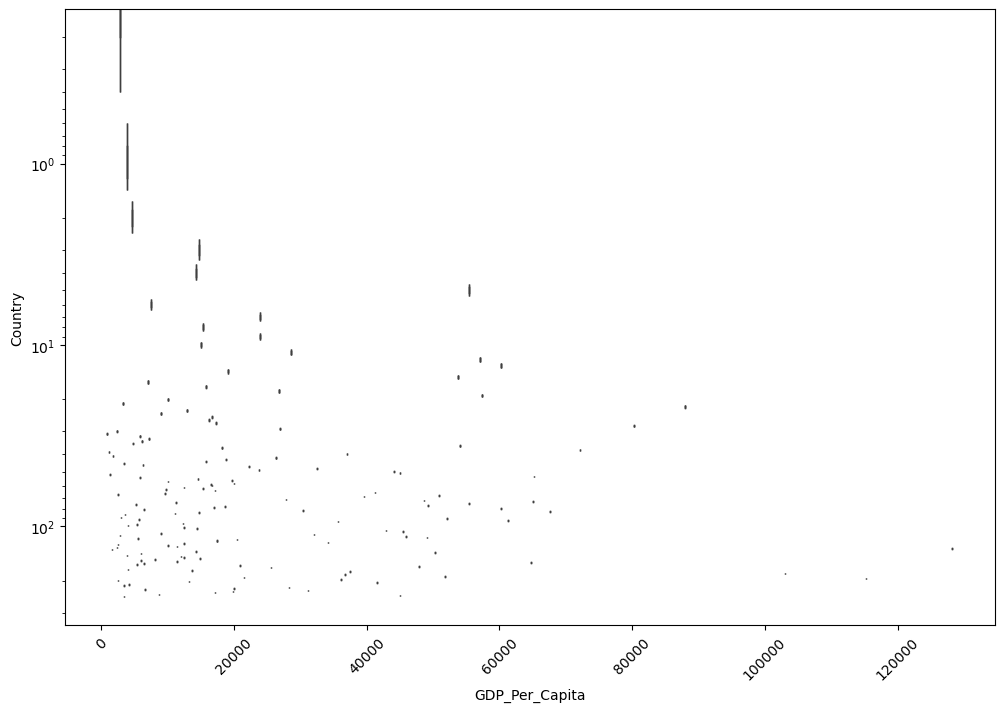

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=gdp_2020, x="GDP_Per_Capita", y="Country")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

8.4. Create a violin plot.

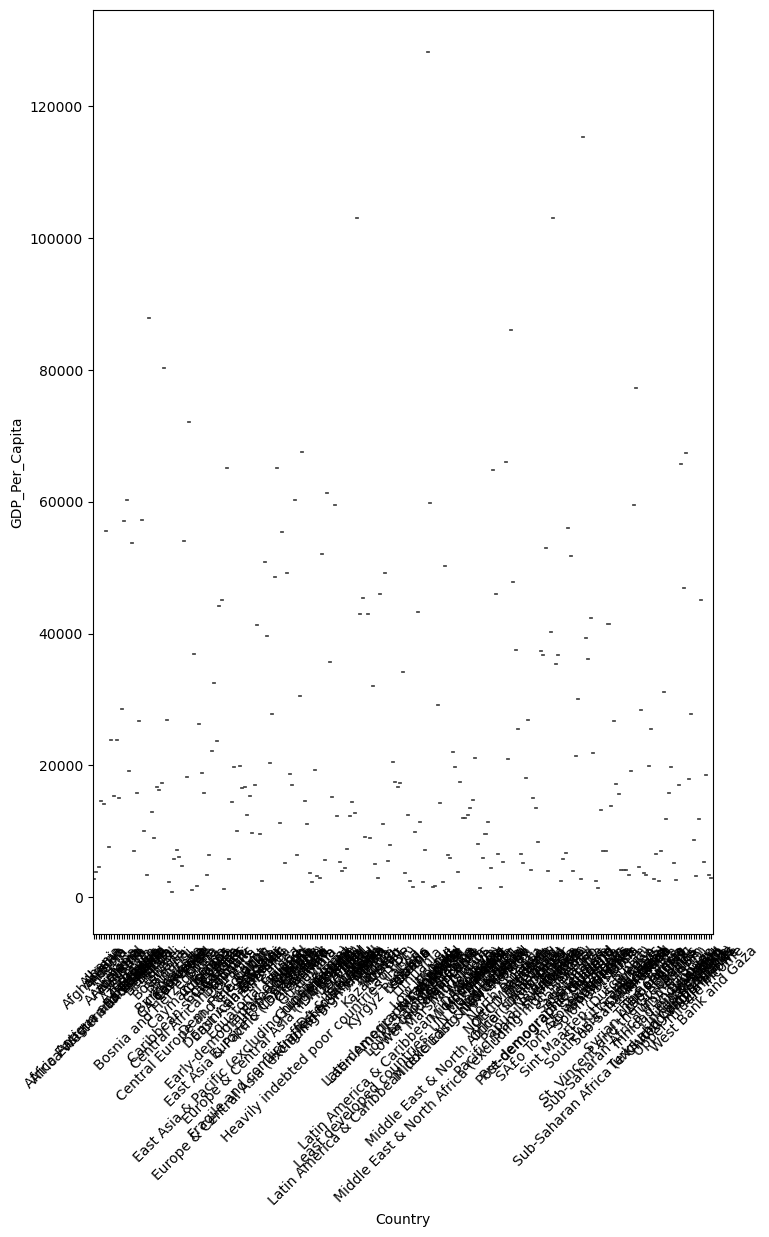

In [27]:
plt.figure(figsize = (8, 12))
sns.violinplot(x=gdp_2020["Country"], y=gdp_2020["GDP_Per_Capita"])
plt.xticks(rotation=45)
plt.show()

Try reversing the axises.

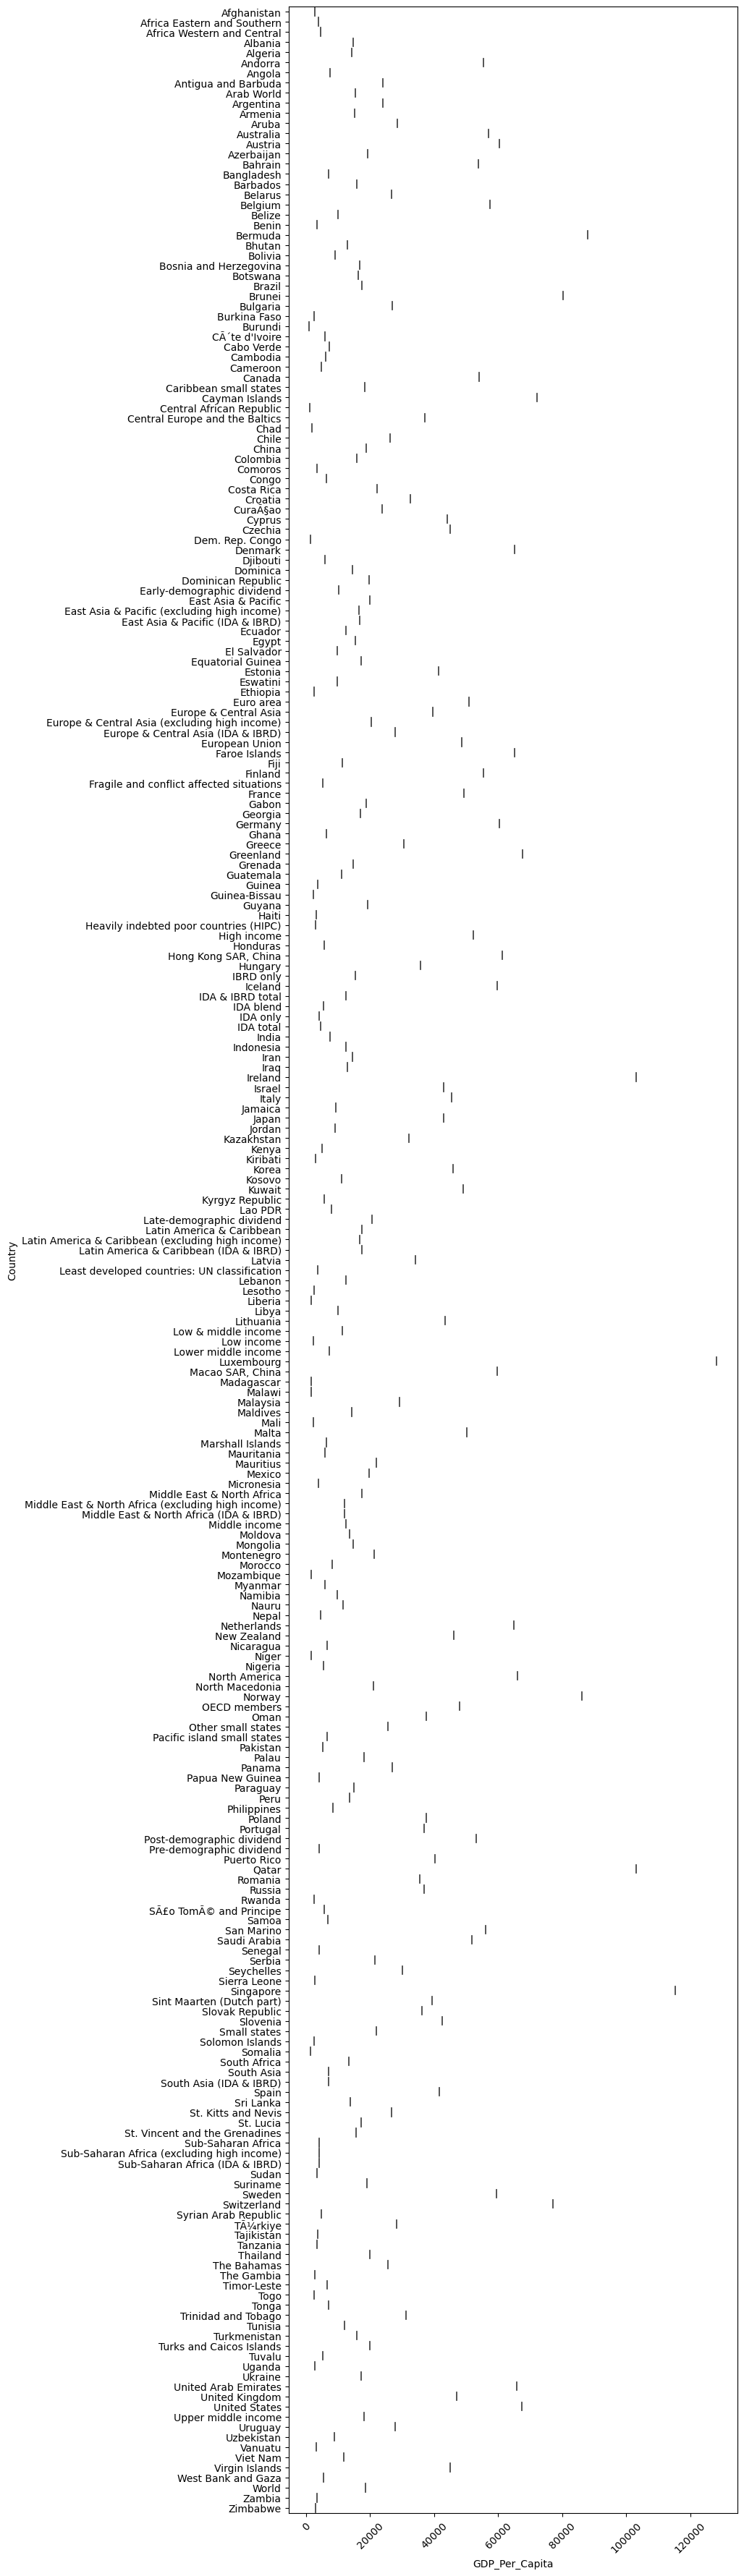

In [28]:
plt.figure(figsize = (8, 45))
sns.violinplot(x=gdp_2020["GDP_Per_Capita"], y=gdp_2020["Country"])
plt.xticks(rotation=45)
plt.show()

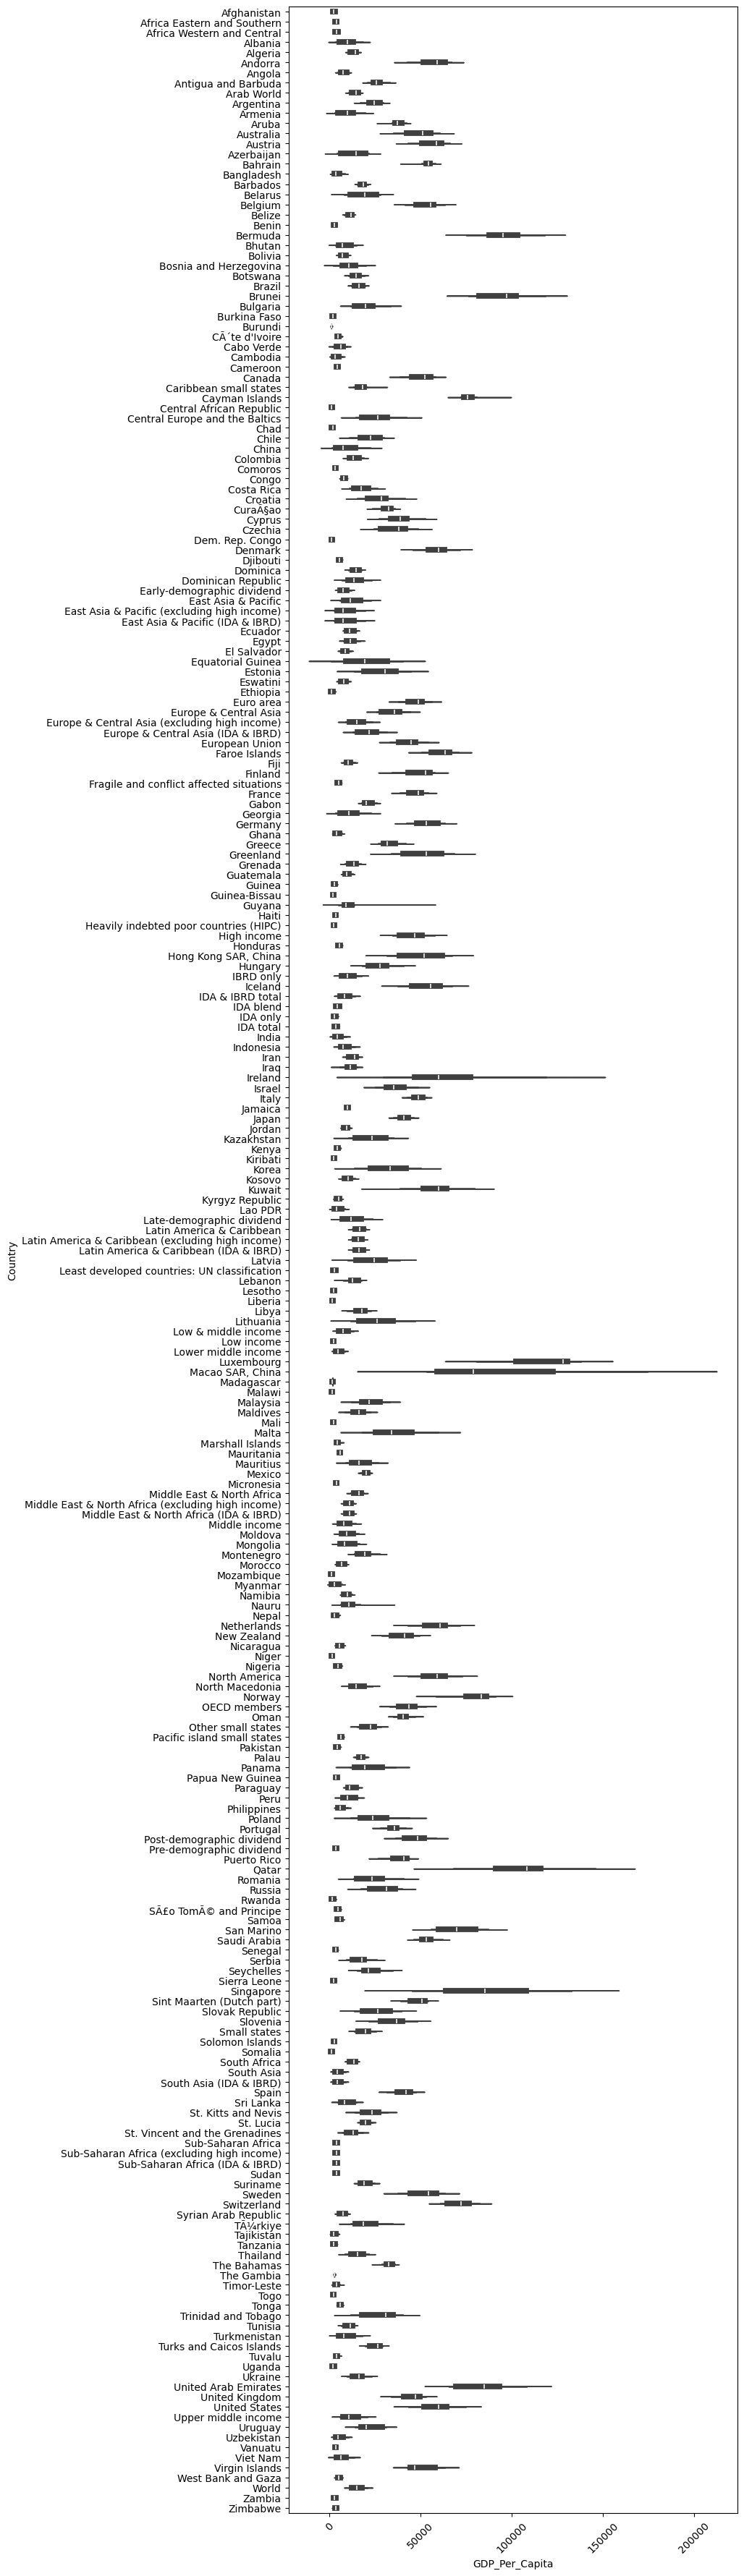

In [29]:
###This one looked better before I subset for 2020
plt.figure(figsize = (8, 45))
sns.violinplot(x=gdp_df_clean["GDP_Per_Capita"], y=gdp_df_clean["Country"])
plt.xticks(rotation=45)
plt.show()

9.  What was the median GDP per capita value in 2020?

In [30]:
gdp_df_clean[gdp_df_clean["Year"] == 2020]["GDP_Per_Capita"].median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
    Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
 	* A boxplot
 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
 	* A scatterplot
 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-
      seaborn)
   Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

Start by subsetting your data to just these 4 years (1990, 2000, 2010, 2020) into a new DataFrame named gdp_decades. 

In [31]:
gdp_decades =gdp_df_clean[ gdp_df_clean ["Year"] .isin([1990, 2000, 2010, 2020])]

Using this, create a boxplot.

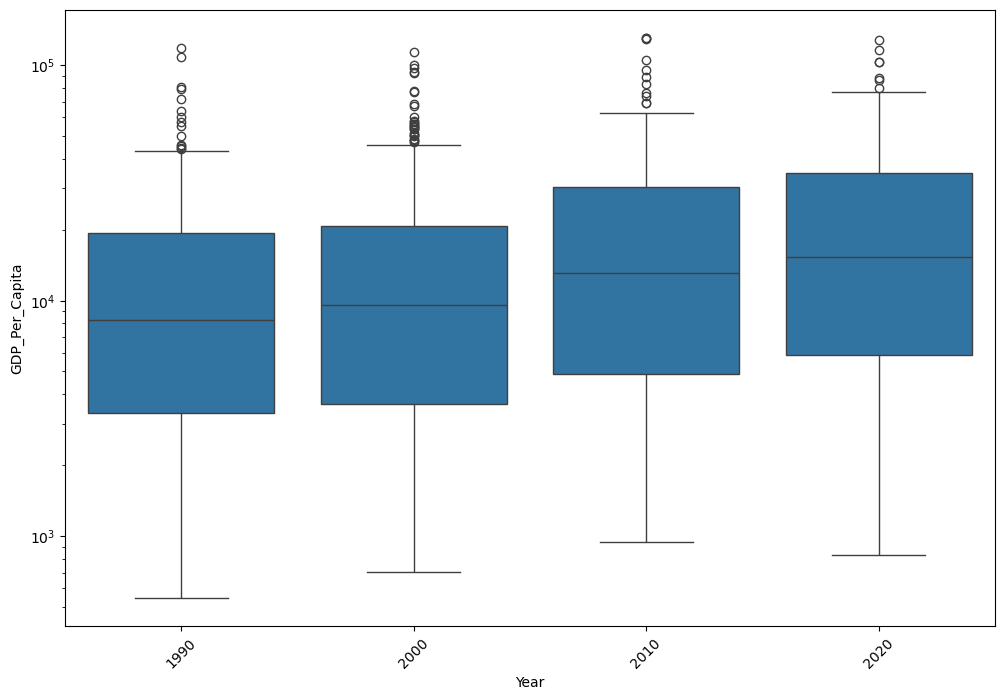

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot( data = gdp_decades, x = "Year", y = "GDP_Per_Capita")
plt.xticks(rotation = 45)
plt.yscale("log")
plt.show()

Using this, create a barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

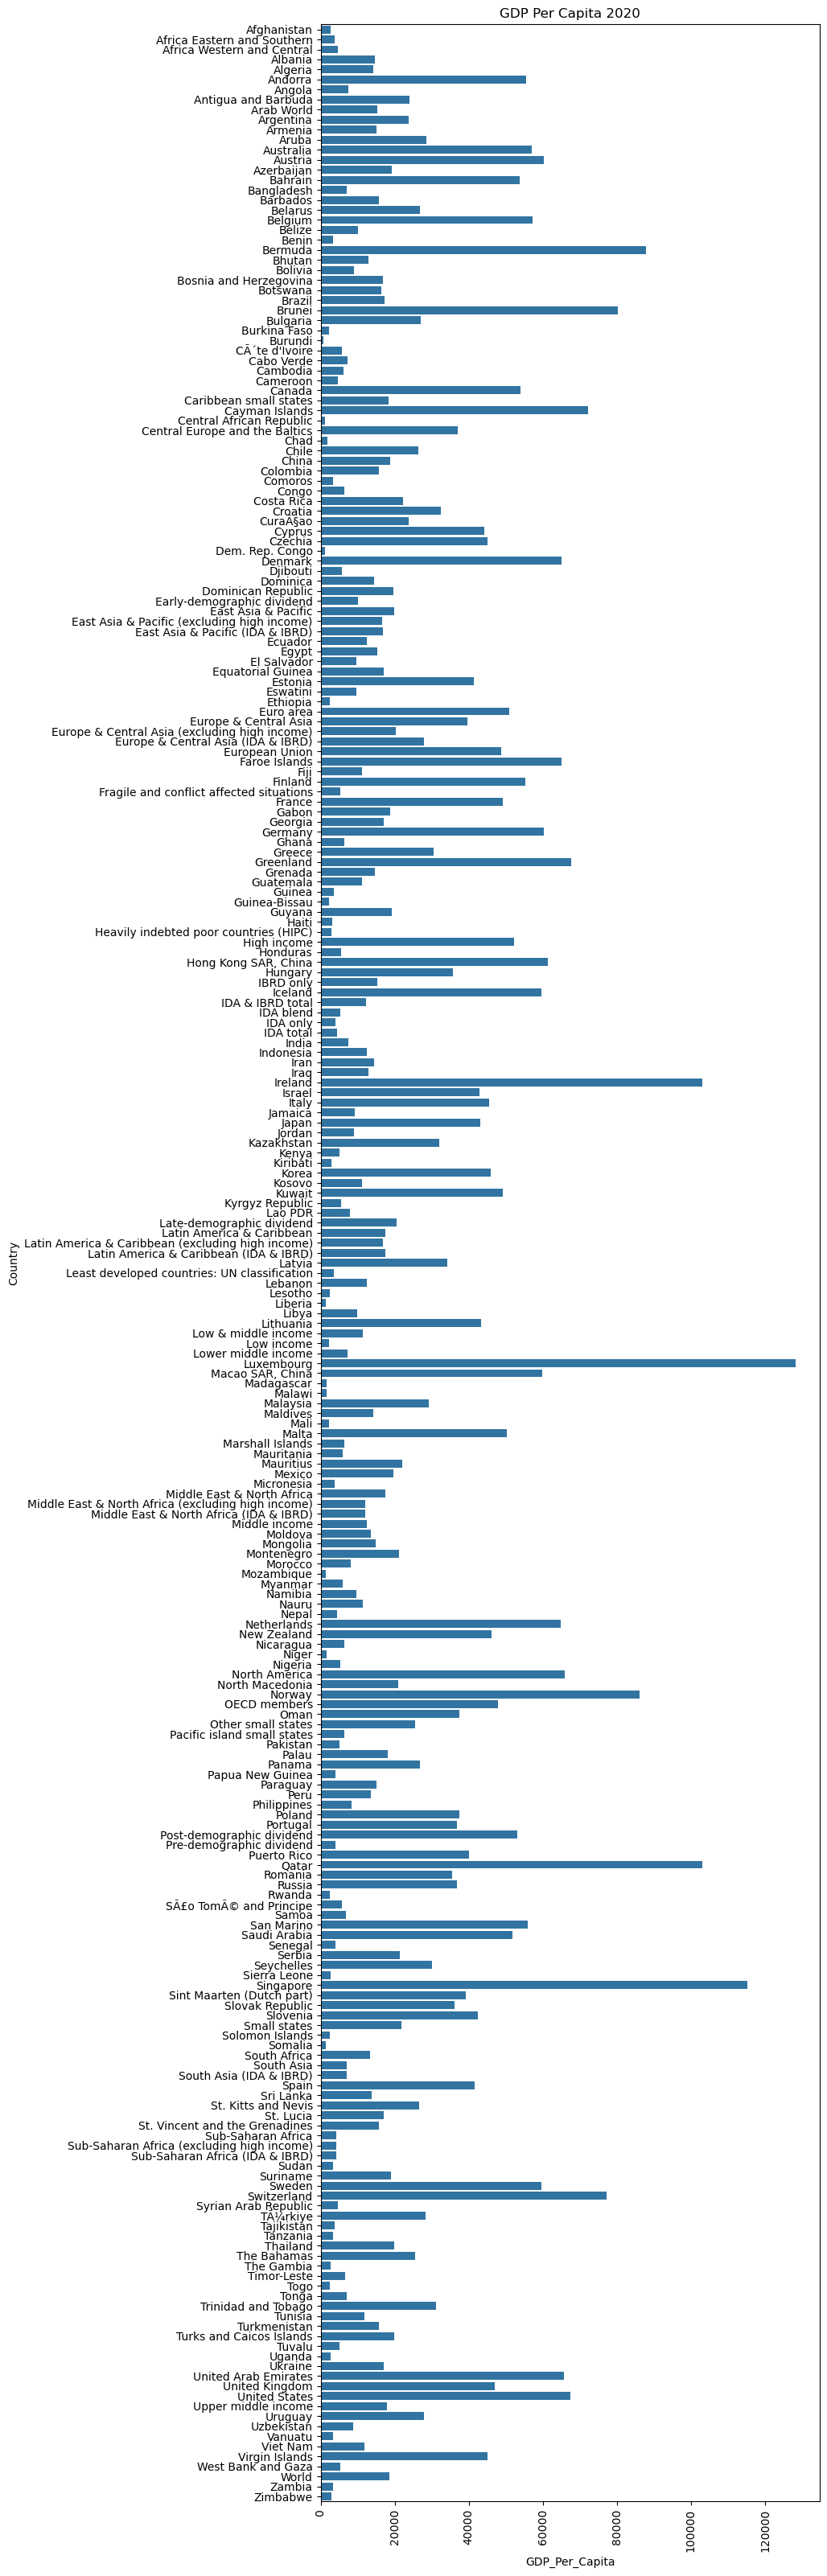

In [33]:
plt.figure(figsize = (8, 40))
sns.barplot(data = gdp_2020, x = "GDP_Per_Capita", y = "Country")
plt.xticks(rotation = 90)
plt.title("GDP Per Capita 2020")
plt.show()
### FIX

Using this, create a scatterplot.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

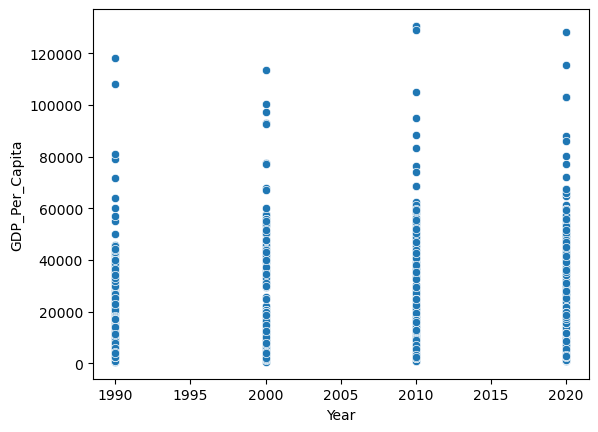

In [34]:
sns.scatterplot(data = gdp_decades, x = "Year", y = "GDP_Per_Capita")

Using this, create a scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit- seaborn) Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

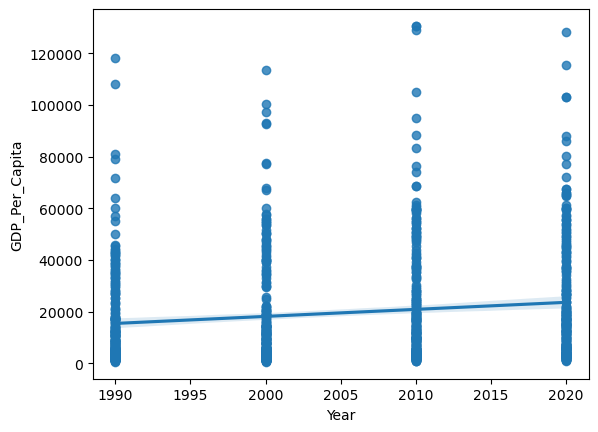

In [35]:
sns.regplot(data = gdp_decades, x = "Year", y = "GDP_Per_Capita")

11. Which country was the first to have a GDP per capita greater than $100,000?

In [36]:
gdp_df_clean.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [37]:
first_gdp_100k = (
    gdp_df_clean[gdp_df_clean["GDP_Per_Capita"] >= 100000]
    .sort_values("Year"))
first_gdp_100k.head(5)

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan 
    of the dataset.

In [38]:
highest_gdp_2020 = gdp_df_clean[gdp_df_clean["Year"] == 2020]
highest_gdp_2020 = highest_gdp_2020[highest_gdp_2020["GDP_Per_Capita"] == highest_gdp_2020["GDP_Per_Capita"].max()]
highest_gdp_2020.head()

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


In [39]:
luxembourg_gdp = gdp_df_clean[gdp_df_clean["Country"] == "Luxembourg"]
luxembourg_gdp.head()

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616


Text(0.5, 1.0, 'Luxembourg GDP')

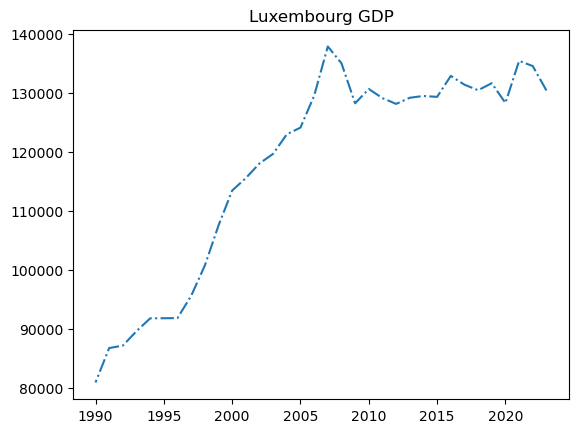

In [40]:
plt.plot(luxembourg_gdp['Year'], luxembourg_gdp['GDP_Per_Capita'], linestyle = '-.')
plt.title("Luxembourg GDP")

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan 
    of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
    Which countries had lower GDP per capita in 2020 than in 1990?

In [41]:
lowest_gdp_2020 = gdp_df_clean[gdp_df_clean["Year"] == 2020]
lowest_gdp_2020 = lowest_gdp_2020[lowest_gdp_2020["GDP_Per_Capita"] == lowest_gdp_2020["GDP_Per_Capita"].min()]
lowest_gdp_2020.head()

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257


In [42]:
burundi_gdp = gdp_df_clean[gdp_df_clean["Country"] == "Burundi"]
burundi_gdp.head()

,Country,Year,GDP_Per_Capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720


Text(0.5, 1.0, 'Burundi GDP')

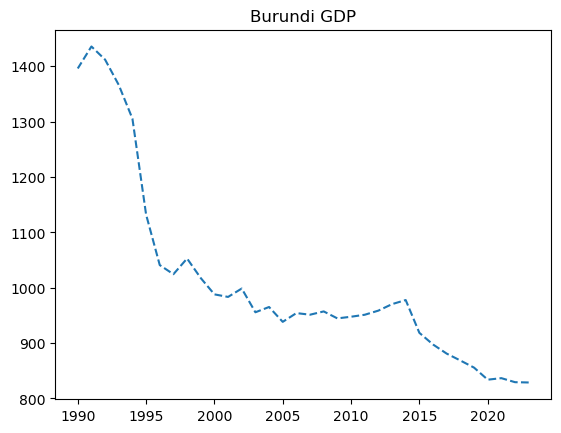

In [43]:
plt.plot(burundi_gdp['Year'], burundi_gdp['GDP_Per_Capita'], linestyle = '--')
plt.title("Burundi GDP")

**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
    Which countries had lower GDP per capita in 2020 than in 1990?

In [44]:
gdp_2020 = gdp_df_clean[gdp_df_clean["Year"] == 2020]
gdp_1990 = gdp_df_clean[gdp_df_clean["Year"] == 1990]

In [45]:
### Finish Bonus...

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. 
    Check the arguments for the read_csv function to find ones that can help correct the errors 
    (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom 
    few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [80]:
internet_df = pd.read_csv('..\data\da16-python-gdp-and-internet-use-analysis-DSVaughan266\data\internet.csv',
                         nrows = 6082)

In [78]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [81]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6077,Zimbabwe,1998,0.081648,NaN
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [82]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6082 entries, 0 to 6081
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6082 non-null   object 
 1   Year             6082 non-null   int64  
 2   Value            6082 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [83]:
internet_df = internet_df.drop("Value Footnotes", axis = 1)

In [84]:
internet_df.columns = ["Country", "Year", "Internet_Users_Pct"]

In [85]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?
    The number of records for each year increase to 2007, then decrease again. 

In [87]:
internet_df["Year"].value_counts().sort_index()

Year
1990    225
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: count, dtype: int64

17. What is the first year to have a non-zero internet users percentage value?
    1990

In [99]:
first_nonzero = internet_df[internet_df["Internet_Users_Pct"] > 0].groupby("Country")["Year"].min().reset_index().sort_values("Year")

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [103]:
zoom_2000_to_2014 = internet_df[
    (internet_df["Year"] >= 2000) & (internet_df["Year"] <= 2014)]

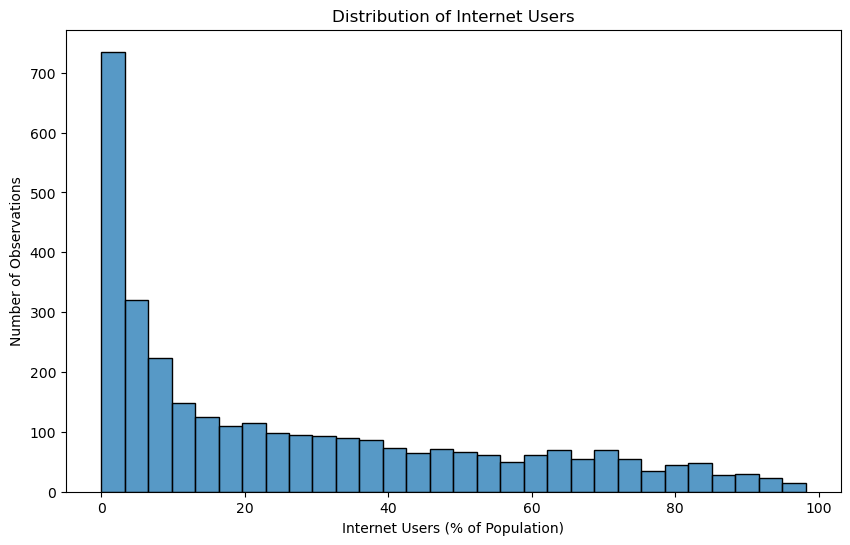

In [116]:
plt.figure(figsize = (10, 6))
sns.histplot(zoom_2000_to_2014["Internet_Users_Pct"], bins = 30)
plt.title("Distribution of Internet Users")
plt.xlabel("Internet Users (% of Population)")
plt.ylabel("Number of Observations")
plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [119]:
pct_2014 = internet_df[internet_df["Year"] == 2014]

In [120]:
pct_2014.head()

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623


In [125]:
under_5pct = pct_2014[pct_2014["Internet_Users_Pct"] < 5]

In [129]:
under_5_countries = under_5pct["Country"].nunique()
print(under_5_countries)

10


In [ ]:
20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
    Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [136]:
gdp_and_internet_use = pd.merge(
    gdp_df_clean, internet_df,
    on = ["Country", "Year"],
    how = "outer")

In [137]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


In [138]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9494,Zimbabwe,2019,3294.806084,26.5883
9495,Zimbabwe,2020,2987.269823,29.2986
9496,Zimbabwe,2021,3184.785451,32.4616
9497,Zimbabwe,2022,3323.121932,32.5615
9498,Zimbabwe,2023,3442.251327,NaN


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid 
    (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. 
    What do you notice?

In [ ]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? 
#     If you see any unusual points, investigate them.

# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries 
#     in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". 
#     Put these labels in a new column, named "GDP_group".

# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

# ### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.
